# **Phase 4 Part A - Data summarization, data preprocessing and feature selections**
Émilie Brazeau, Nicholas Gin, Gordon Tang


PostgreSQL queries to copy the data from the data mart into a csv (note that we include all columns in the data mart except for the keys).

To run this query on your own machine, please update the filepath after TO (the last line) to indicate where the csv will be saved!

(We have uploaded this csv to a Google Drive and use it throughout this notebook)

In [ ]:
"""
COPY (
SELECT
  r.review_text,
  r.rating,
  b.branch_name,
  d.month,
  d.quarter,
  d.year, 
  ba.attendance_millions_2006,
  ba.attendance_millions_2007,
  ba.attendance_millions_2008,
  ba.attendance_millions_2009,
  ba.attendance_millions_2010,
  ba.attendance_millions_2011,
  ba.attendance_millions_2012,
  ba.attendance_millions_2013,
  ba.attendance_millions_2014,
  ba.attendance_millions_2015,
  ba.attendance_millions_2016,
  ba.attendance_millions_2017,
  ba.attendance_millions_2018,
  ba.attendance_millions_2019,
  ba.attendance_millions_2020,
  ba.attendance_millions_2021
FROM
  review_fact f
  JOIN branch_dimension b ON f.branch_key = b.branch_key
  JOIN review_text_dimension r ON f.review_text_key = r.review_text_key
  JOIN date_dimension d ON f.date_key = d.date_key
  JOIN branch_attendance_outrigger_dimension ba ON ba.branch_attendance_key =  b.branch_attendance_key
) TO '/Users/nicholasgin/Desktop/phase4_data.csv' WITH CSV HEADER ENCODING 'UTF8';
"""

"\nCOPY (\nSELECT\n  r.review_text,\n  r.rating,\n  b.branch_name,\n  d.month,\n  d.quarter,\n  d.year, \n  ba.attendance_millions_2006,\n  ba.attendance_millions_2007,\n  ba.attendance_millions_2008,\n  ba.attendance_millions_2009,\n  ba.attendance_millions_2010,\n  ba.attendance_millions_2011,\n  ba.attendance_millions_2012,\n  ba.attendance_millions_2013,\n  ba.attendance_millions_2014,\n  ba.attendance_millions_2015,\n  ba.attendance_millions_2016,\n  ba.attendance_millions_2017,\n  ba.attendance_millions_2018,\n  ba.attendance_millions_2019,\n  ba.attendance_millions_2020,\n  ba.attendance_millions_2021\nFROM\n  review_fact f\n  JOIN branch_dimension b ON f.branch_key = b.branch_key\n  JOIN review_text_dimension r ON f.review_text_key = r.review_text_key\n  JOIN date_dimension d ON f.date_key = d.date_key\n  JOIN branch_attendance_outrigger_dimension ba ON ba.branch_attendance_key =  b.branch_attendance_key\n) TO '/Users/nicholasgin/Desktop/phase4_data.csv' WITH CSV HEADER ENCODIN

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Loading the data
url='https://drive.google.com/file/d/11yVvSg8y82wWOsdbiGDxb4QFluCV_Xii/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='UTF-8')

df

,review_text,rating,branch_name,month,quarter,year,attendance_millions_2006,attendance_millions_2007,attendance_millions_2008,attendance_millions_2009,...,attendance_millions_2012,attendance_millions_2013,attendance_millions_2014,attendance_millions_2015,attendance_millions_2016,attendance_millions_2017,attendance_millions_2018,attendance_millions_2019,attendance_millions_2020,attendance_millions_2021
0,daughter spent sunny hot day disneyland hong k...,4,Disneyland Hong Kong,7,3,2014,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
1,location infront mtr station time required cov...,5,Disneyland Hong Kong,11,4,2013,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
2,spent day disneyland great time family friendl...,5,Disneyland Hong Kong,4,2,2018,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
3,recent tour hong kong limited time choose diff...,5,Disneyland Hong Kong,5,2,2017,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
4,hong kong young kid place go fun obviously pie...,5,Disneyland Hong Kong,4,2,2017,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,visit universal orlando brilliant experience p...,5,Universal Studios Florida,8,3,2015,6.0,6.20,6.231,5.53,...,6.195,7.062,8.263,9.585,9.998,10.198,10.708,10.922,4.096,8.987
90842,universal studio shall begin staff lovely ride...,5,Universal Studios Singapore,9,3,2016,NaN,NaN,NaN,NaN,...,3.480,3.650,3.840,4.200,4.100,4.220,4.400,4.500,1.098,1.200
90843,split day two park 10 hour great fun staff ama...,5,Universal Studios Florida,10,4,2016,6.0,6.20,6.231,5.53,...,6.195,7.062,8.263,9.585,9.998,10.198,10.708,10.922,4.096,8.987
90844,definitely great ride experience jurassic park...,4,Universal Studios Florida,7,3,2018,6.0,6.20,6.231,5.53,...,6.195,7.062,8.263,9.585,9.998,10.198,10.708,10.922,4.096,8.987


# **Part A.1**

For more detailed visualizations and data summarizations, please see the work we did for Phase 3 Part B!

We created histograms for the numeric attributes in our data mart.

We noticed that our dataset is skewed towards positive ratings (particularly 5 star ratings).

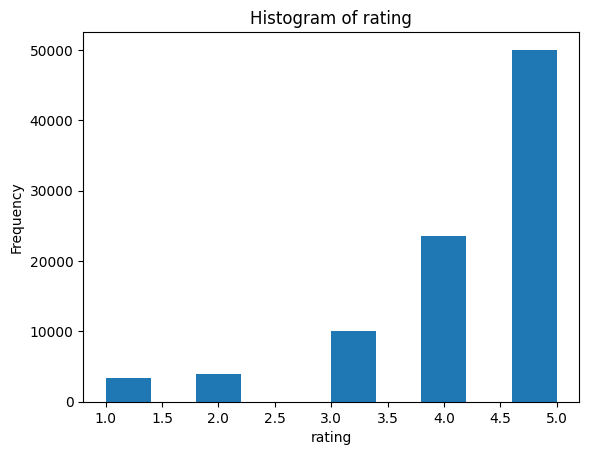

In [ ]:
# Create histograms for numeric columns
numeric_cols = ['rating']
for col in numeric_cols:
    fig, ax = plt.subplots()
    ax.hist(df[col], bins=10)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()

We created bar graphs for the categorical attributes in our data mart.

We see in the distribution of our data that a very minimal number of reviews were written before 2010.

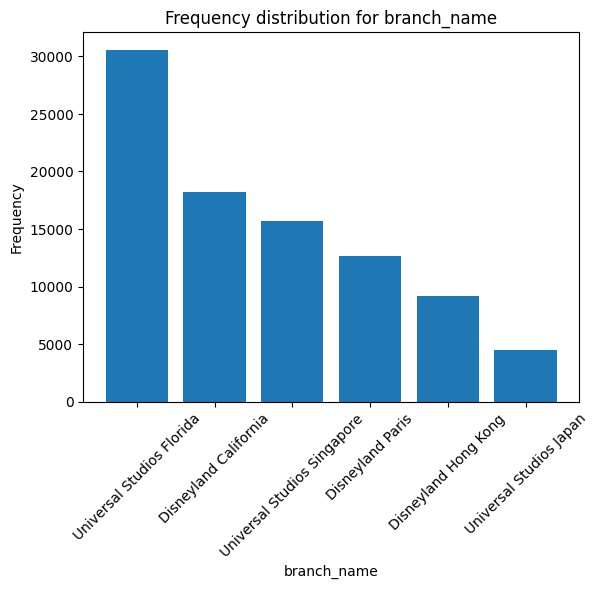

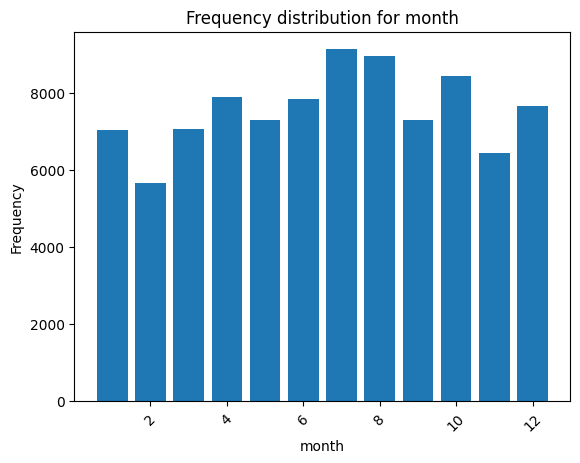

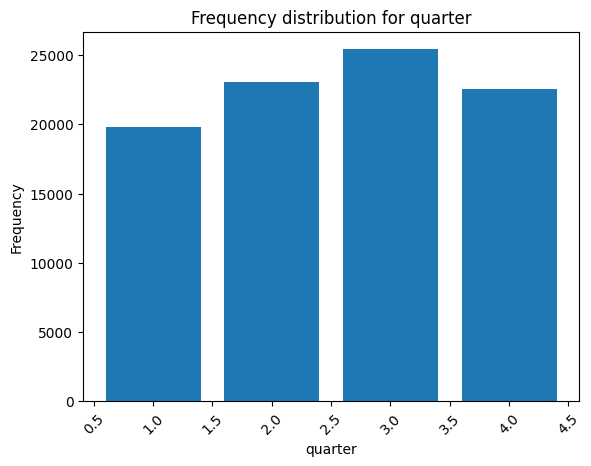

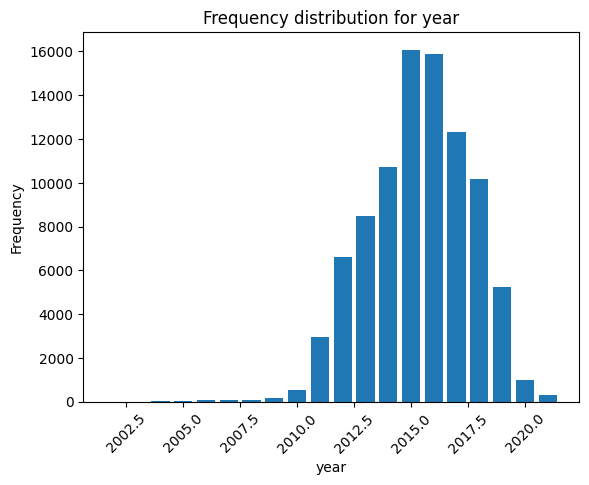

In [ ]:
# Create bar graphs for categorical columns
categorical_cols = ['branch_name', 'month', 'quarter', 'year']
for col in categorical_cols:
    freq_dist = df[col].value_counts()
    fig, ax = plt.subplots()
    ax.bar(freq_dist.index, freq_dist.values)
    ax.set_title(f'Frequency distribution for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

A scatterplot depicting review rating vs. number of reviews by branch:

We can see that Universal Studios Florida had the highest number of 5 star ratings.

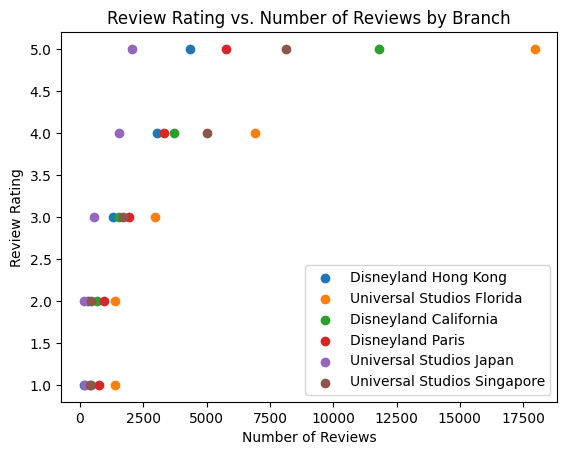

In [ ]:
# Filter for Disneyland and Universal Studios
df_s1 = df[df['branch_name'].str.contains('Disneyland|Universal Studios')]

# Group by branch and rating
grouped = df_s1.groupby(['branch_name', 'rating']).size().reset_index(name='count')

# Create a scatter plot for each branch
for branch in df_s1['branch_name'].unique():
    data = grouped[grouped['branch_name'] == branch]
    plt.scatter(data['count'], data['rating'], label=branch)

# Add labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Review Rating')
plt.title('Review Rating vs. Number of Reviews by Branch')

# Add legend
plt.legend()

# Show the plot
plt.show()

A boxplot of ratings for Disneyland and Universal Studios (grouped by branch):

It appears that for all branches besides Disneyland Paris, 1 star and 2 star ratings are considered to be outliers.

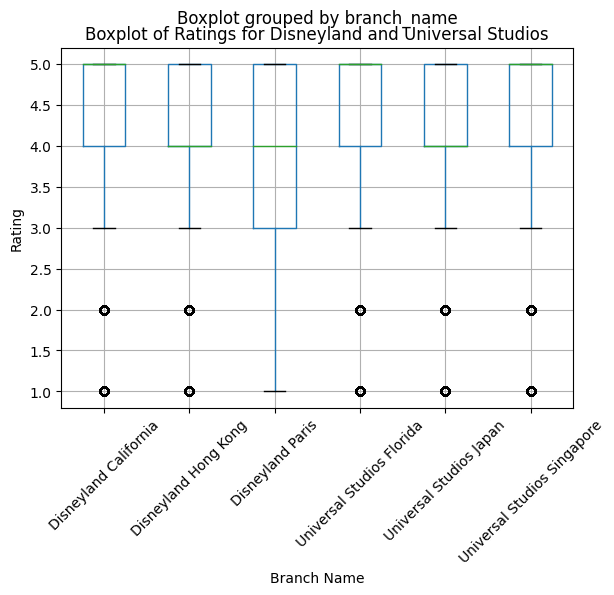

In [ ]:
# select the data for Disneyland and Universal Studios
df_b1 = df[df['branch_name'].str.contains('Disneyland|Universal Studios')]

# create the box plot
boxplot = df_b1.boxplot(column='rating', by='branch_name')

# rotate the x-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

# add labels and title
plt.xlabel('Branch Name')
plt.ylabel('Rating')
plt.title('Boxplot of Ratings for Disneyland and Universal Studios')

# show the plot
plt.show()

# **Part A.2**

# Pre-processing

While we already handled missing values during Phase 2, we had null values for our Universal Studios Singapore attendance data for the years: 2006-2009 (since the branch did not open until 2010).

None of the classifiers that we need to use for this phase accept null values when training, so we have decided to remove all reviews (and their corresponding attendance data) that were written before 2010 from the training data.

From our data summarization in Part A.1, we see that we have extremely limited review data for before 2010. Only 491 entries out of the 90846 reviews in our data mart are actually from before 2010, so removing them would have minimal impact on our classification tasks and training.

In [ ]:
num_entries = df[(df['year'] <= 2009)].shape[0]
print(f"There are {num_entries} entries for the years <= 2009.")

df = df[df['year'] > 2009]
#df.drop(columns = ['attendance_millions_2006', 'attendance_millions_2007', 'attendance_millions_2008', 'attendance_millions_2009'], axis = 1, inplace = True)

df

There are 491 entries for the years <= 2009.


,review_text,rating,branch_name,month,quarter,year,attendance_millions_2006,attendance_millions_2007,attendance_millions_2008,attendance_millions_2009,...,attendance_millions_2012,attendance_millions_2013,attendance_millions_2014,attendance_millions_2015,attendance_millions_2016,attendance_millions_2017,attendance_millions_2018,attendance_millions_2019,attendance_millions_2020,attendance_millions_2021
0,daughter spent sunny hot day disneyland hong k...,4,Disneyland Hong Kong,7,3,2014,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
1,location infront mtr station time required cov...,5,Disneyland Hong Kong,11,4,2013,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
2,spent day disneyland great time family friendl...,5,Disneyland Hong Kong,4,2,2018,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
3,recent tour hong kong limited time choose diff...,5,Disneyland Hong Kong,5,2,2017,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
4,hong kong young kid place go fun obviously pie...,5,Disneyland Hong Kong,4,2,2017,5.2,4.15,4.500,4.60,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,visit universal orlando brilliant experience p...,5,Universal Studios Florida,8,3,2015,6.0,6.20,6.231,5.53,...,6.195,7.062,8.263,9.585,9.998,10.198,10.708,10.922,4.096,8.987
90842,universal studio shall begin staff lovely ride...,5,Universal Studios Singapore,9,3,2016,NaN,NaN,NaN,NaN,...,3.480,3.650,3.840,4.200,4.100,4.220,4.400,4.500,1.098,1.200
90843,split day two park 10 hour great fun staff ama...,5,Universal Studios Florida,10,4,2016,6.0,6.20,6.231,5.53,...,6.195,7.062,8.263,9.585,9.998,10.198,10.708,10.922,4.096,8.987
90844,definitely great ride experience jurassic park...,4,Universal Studios Florida,7,3,2018,6.0,6.20,6.231,5.53,...,6.195,7.062,8.263,9.585,9.998,10.198,10.708,10.922,4.096,8.987


**Handling categorical attributes**

We performed one-hot encoding on our branch_name columns (they are categorical attributes that are strings), so that these attributes can be accepted by the classifiers in Part B.

In [ ]:
# Perform one-hot encoding on the 'branch_name' column.
branch_dummies = pd.get_dummies(df['branch_name'], prefix = 'branch')

# Concatenate the one-hot encoded branches to the dataframe.
df = pd.concat([df, branch_dummies], axis=1)

# Drop the 'branch_name' column.
df = df.drop('branch_name', axis=1)

# Re-order columns.
df = df.reindex(columns=['review_text', 'rating', 'branch_Disneyland California', 'branch_Disneyland Hong Kong', 'branch_Disneyland Paris', 'branch_Universal Studios Florida', 
                         'branch_Universal Studios Japan', 'branch_Universal Studios Singapore', 'month', 'quarter', 'year', 'attendance_millions_2010', 'attendance_millions_2011', 'attendance_millions_2012',
                         'attendance_millions_2013', 'attendance_millions_2014', 'attendance_millions_2015', 'attendance_millions_2016', 'attendance_millions_2017',
                         'attendance_millions_2018', 'attendance_millions_2019', 'attendance_millions_2020', 'attendance_millions_2021'])

df

,review_text,rating,branch_Disneyland California,branch_Disneyland Hong Kong,branch_Disneyland Paris,branch_Universal Studios Florida,branch_Universal Studios Japan,branch_Universal Studios Singapore,month,quarter,...,attendance_millions_2012,attendance_millions_2013,attendance_millions_2014,attendance_millions_2015,attendance_millions_2016,attendance_millions_2017,attendance_millions_2018,attendance_millions_2019,attendance_millions_2020,attendance_millions_2021
0,daughter spent sunny hot day disneyland hong k...,4,0,1,0,0,0,0,7,3,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
1,location infront mtr station time required cov...,5,0,1,0,0,0,0,11,4,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
2,spent day disneyland great time family friendl...,5,0,1,0,0,0,0,4,2,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
3,recent tour hong kong limited time choose diff...,5,0,1,0,0,0,0,5,2,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
4,hong kong young kid place go fun obviously pie...,5,0,1,0,0,0,0,4,2,...,6.700,7.400,7.600,6.800,6.100,6.200,6.700,5.695,1.700,2.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,visit universal orlando brilliant experience p...,5,0,0,0,1,0,0,8,3,...,6.195,7.062,8.263,9.585,9.998,10.198,10.708,10.922,4.096,8.987
90842,universal studio shall begin staff lovely ride...,5,0,0,0,0,0,1,9,3,...,3.480,3.650,3.840,4.200,4.100,4.220,4.400,4.500,1.098,1.200
90843,split day two park 10 hour great fun staff ama...,5,0,0,0,1,0,0,10,4,...,6.195,7.062,8.263,9.585,9.998,10.198,10.708,10.922,4.096,8.987
90844,definitely great ride experience jurassic park...,4,0,0,0,1,0,0,7,3,...,6.195,7.062,8.263,9.585,9.998,10.198,10.708,10.922,4.096,8.987


**Standardization of numeric attributes**

We standardized each attendance (millions) column to ensure that these features have a similar impact on the analysis and that data mining algorithms are not biased towards features with larger scales.

We chose standardizing over normalizing because the range of attendance values is relatively narrow (for the entire dataset, these values range between 4-15 million).

In [ ]:
from sklearn.preprocessing import StandardScaler

attendances = ['attendance_millions_2010', 'attendance_millions_2011', 'attendance_millions_2012', 'attendance_millions_2013', 'attendance_millions_2014', 'attendance_millions_2015', 'attendance_millions_2016', 'attendance_millions_2017', 'attendance_millions_2018', 'attendance_millions_2019', 'attendance_millions_2020', 'attendance_millions_2021']

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the attendance columns
df[attendances] = scaler.fit_transform(df[attendances])

df

,review_text,rating,branch_Disneyland California,branch_Disneyland Hong Kong,branch_Disneyland Paris,branch_Universal Studios Florida,branch_Universal Studios Japan,branch_Universal Studios Singapore,month,quarter,...,attendance_millions_2012,attendance_millions_2013,attendance_millions_2014,attendance_millions_2015,attendance_millions_2016,attendance_millions_2017,attendance_millions_2018,attendance_millions_2019,attendance_millions_2020,attendance_millions_2021
0,daughter spent sunny hot day disneyland hong k...,4,0,1,0,0,0,0,7,3,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
1,location infront mtr station time required cov...,5,0,1,0,0,0,0,11,4,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
2,spent day disneyland great time family friendl...,5,0,1,0,0,0,0,4,2,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
3,recent tour hong kong limited time choose diff...,5,0,1,0,0,0,0,5,2,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
4,hong kong young kid place go fun obviously pie...,5,0,1,0,0,0,0,4,2,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,visit universal orlando brilliant experience p...,5,0,0,0,1,0,0,8,3,...,-0.559182,-0.458312,-0.308994,-0.185408,-0.038519,-0.074019,-0.033271,0.015606,0.834246,0.948710
90842,universal studio shall begin staff lovely ride...,5,0,0,0,0,0,1,9,3,...,-1.185813,-1.279161,-1.369828,-1.351164,-1.306594,-1.345734,-1.377830,-1.328516,-1.625254,-1.478053
90843,split day two park 10 hour great fun staff ama...,5,0,0,0,1,0,0,10,4,...,-0.559182,-0.458312,-0.308994,-0.185408,-0.038519,-0.074019,-0.033271,0.015606,0.834246,0.948710
90844,definitely great ride experience jurassic park...,4,0,0,0,1,0,0,7,3,...,-0.559182,-0.458312,-0.308994,-0.185408,-0.038519,-0.074019,-0.033271,0.015606,0.834246,0.948710


In [ ]:
# Last check for null values in the dataframe.
print(df.isnull().sum())

review_text                           0
rating                                0
branch_Disneyland California          0
branch_Disneyland Hong Kong           0
branch_Disneyland Paris               0
branch_Universal Studios Florida      0
branch_Universal Studios Japan        0
branch_Universal Studios Singapore    0
month                                 0
quarter                               0
year                                  0
attendance_millions_2010              0
attendance_millions_2011              0
attendance_millions_2012              0
attendance_millions_2013              0
attendance_millions_2014              0
attendance_millions_2015              0
attendance_millions_2016              0
attendance_millions_2017              0
attendance_millions_2018              0
attendance_millions_2019              0
attendance_millions_2020              0
attendance_millions_2021              0
dtype: int64


Feature selection is done when there is an abundant number of features, which is not our case.

Export the pre-processed data so that it can be used in Phase B to train the model (we saved this exported data to Google Drive).

In [ ]:
# Convert the dataframe to a csv with the delimiter being a , symbol.
# We do not include in the index in the csv.
df.to_csv('data_for_model.csv', sep=',', index=False)

In [ ]:
# Download csv from Google Colab
files.download('data_for_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>